# Functional Magnetic Images Clustering

This program will start by applying PCA decomposition to the FMRI dataset, followed by clustering using the K-Means method.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [3]:
import matplotlib.pyplot as plt
import random

In [4]:
import nilearn
from nilearn import datasets, plotting
from nilearn.image import get_data, index_img, mean_img
from nilearn.regions import Parcellations
import nibabel as nib

In [5]:
dataset = datasets.fetch_development_fmri(n_subjects=1) # magnetic ressonance image dataset

In [6]:
fmri_img = nib.load(dataset.func[0]) # fmri image data

In [7]:
# extracting data from the image with an array
fmri_data = fmri_img.get_fdata()

In [8]:
# transforming the array into 2d so it's possible to get a dataframe
n_volumes = fmri_data.shape[-1]
fmri_data_2d = fmri_data.reshape(-1, n_volumes)

# converting array to dataframe
fmri_df = pd.DataFrame(fmri_data_2d)
fmri_df

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
1,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
2,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
3,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
4,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147495,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
147496,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
147497,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209
147498,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,...,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209,-0.511209


PCA decomposition

In [9]:
n_components = 3
pca = PCA(n_components=n_components)
fmri_data_pca = pca.fit_transform(fmri_data_2d)

In [10]:
pca_df = pd.DataFrame(fmri_data_pca)
pca_df

,0,1,2
0,-1213.080345,-0.090822,-0.11039
1,-1213.080345,-0.090822,-0.11039
2,-1213.080345,-0.090822,-0.11039
3,-1213.080345,-0.090822,-0.11039
4,-1213.080345,-0.090822,-0.11039
...,...,...,...
147495,-1213.080345,-0.090822,-0.11039
147496,-1213.080345,-0.090822,-0.11039
147497,-1213.080345,-0.090822,-0.11039
147498,-1213.080345,-0.090822,-0.11039


Elbow Method to know our best number of clusters

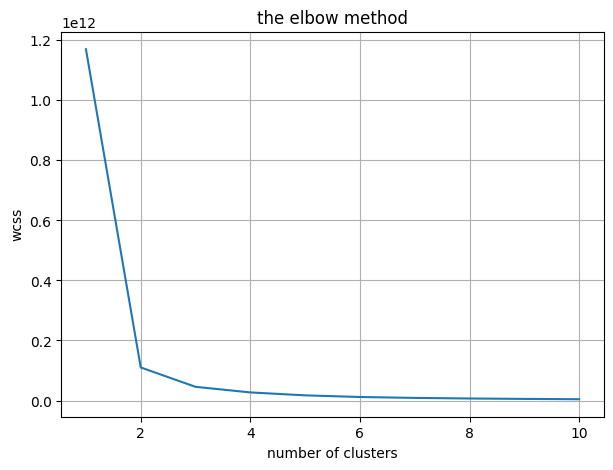

In [16]:
wcss = []
    
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', n_init='auto', max_iter = 1000)
    kmeans.fit(fmri_data_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

KMeans clustering

In [12]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init='auto', max_iter = 1000)
cluster_labels = kmeans.fit_predict(fmri_data_pca)

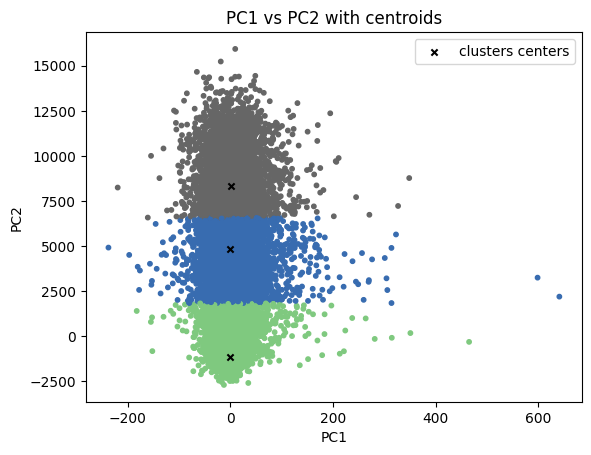

In [13]:
plt.scatter(fmri_data_pca[:,1], fmri_data_pca[:,0], c = cluster_labels, s = 10, cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s = 20, c = 'black', 
            marker='x', label="clusters centers")
plt.title("PC1 vs PC2 with centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [14]:
cluster_labels_3d = cluster_labels.reshape(fmri_data.shape[:-1])

this is how my brain looks like:

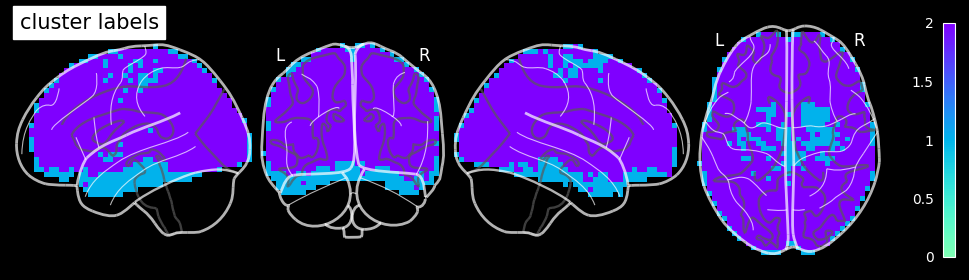

In [15]:
cluster_labels_img = nib.Nifti1Image(cluster_labels_3d, fmri_img.affine)

plotting.plot_glass_brain(cluster_labels_img, 
                          title="cluster labels", 
                          black_bg=True, 
                          display_mode='lyrz', 
                          threshold=0,
                          cmap='rainbow_r',
                          colorbar=True)

plotting.show()

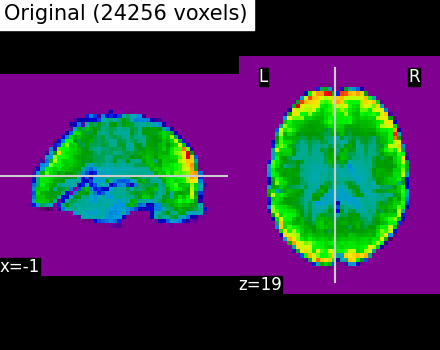